## Exploratory Data Analysis (EDA)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
# from matplotlib import rc
# from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
df_ms = pd.read_csv('./01_rawdata/raw_ms_all0926_df.csv') # read in the ms datasets
df_wd = pd.read_csv('./01_rawdata/raw_wisdm0926_df.csv')  # read in the wisdm datasets

In [5]:
print(df_ms.shape)
print(df_wd.shape)

(1412865, 22)
(1098203, 6)


In [6]:
df_ms.head(2)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,...,weight,height,age,gender,trial,x_axis,y_axis,z_axis,user_id,activity
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,...,102.0,188.0,46.0,1.0,1.0,1.036789,0.485275,0.345870,50.0,Downstairs
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,...,102.0,188.0,46.0,1.0,1.0,0.972504,0.692962,0.082611,50.0,Downstairs


In [7]:
df_wd.head(2)

,user_id,activity,timestamp,x_axis,y_axis,z_axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424


In [8]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412865 entries, 0 to 1412864
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   attitude.roll       1412865 non-null  float64
 1   attitude.pitch      1412865 non-null  float64
 2   attitude.yaw        1412865 non-null  float64
 3   gravity.x           1412865 non-null  float64
 4   gravity.y           1412865 non-null  float64
 5   gravity.z           1412865 non-null  float64
 6   rotationRate.x      1412865 non-null  float64
 7   rotationRate.y      1412865 non-null  float64
 8   rotationRate.z      1412865 non-null  float64
 9   userAcceleration.x  1412865 non-null  float64
 10  userAcceleration.y  1412865 non-null  float64
 11  userAcceleration.z  1412865 non-null  float64
 12  weight              1412865 non-null  float64
 13  height              1412865 non-null  float64
 14  age                 1412865 non-null  float64
 15  gender         

In [9]:
df_wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098203 entries, 0 to 1098202
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1098203 non-null  int64  
 1   activity   1098203 non-null  object 
 2   timestamp  1098203 non-null  int64  
 3   x_axis     1098203 non-null  float64
 4   y_axis     1098203 non-null  float64
 5   z_axis     1098203 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [21]:
df_wd['timestamp'].diff().describe()

count    1.098202e+06
mean     7.513879e+07
std      1.408924e+12
min     -1.312092e+14
25%      4.956100e+07
50%      4.998800e+07
75%      5.004900e+07
max      1.970301e+14
Name: timestamp, dtype: float64

In [24]:
df_wd['timestamp'].diff()[(df_wd['timestamp'].diff()<6.1e7)&(df_wd['timestamp'].diff()>3.9e7)].describe()

count    9.173440e+05
mean     4.809166e+07
std      4.442323e+06
min      3.900100e+07
25%      4.986600e+07
50%      4.998800e+07
75%      5.001900e+07
max      6.097500e+07
Name: timestamp, dtype: float64

**Comment**
- No null values were found
- MS data didn't have time stamps, but they stated that the datasets were collected at 50 Hz.
- WIDSM data had time stamps which gave you the sample rate of the datasets, ~50% of the time intervals were ~50ms, which corresponded to ~20Hz sample rate.
- However, the real sample frequency highly depended on the device status, as we can see ~90% of the time intervals were in the range of 39ms to 61ms, which corresponded to ~16Hz to ~26Hz
sample rate.
- This means 200 samples in MS datasets covered about 4 second in time, while 200 samples in WISDM datasets covered about 10 second.

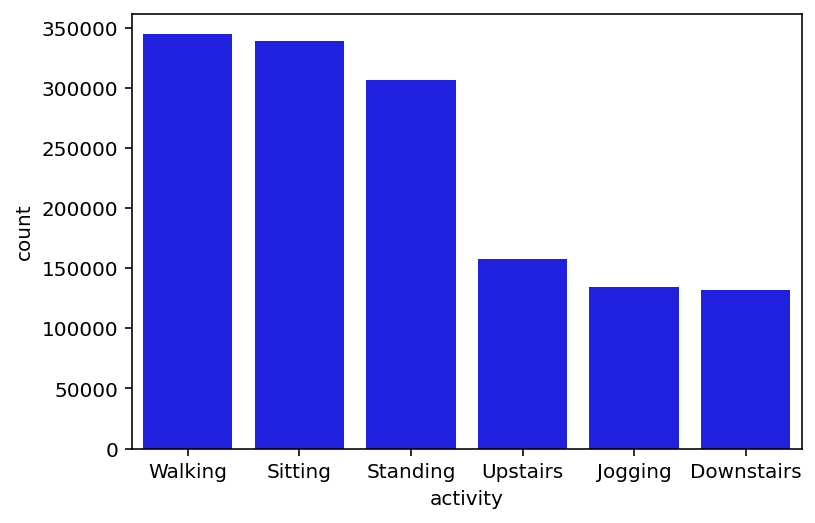

In [25]:
# plot the activities distribution for the ms dataset
sns.countplot(x = 'activity',
              data = df_ms,
              order = df_ms.activity.value_counts().index,
              color = 'b'
              );

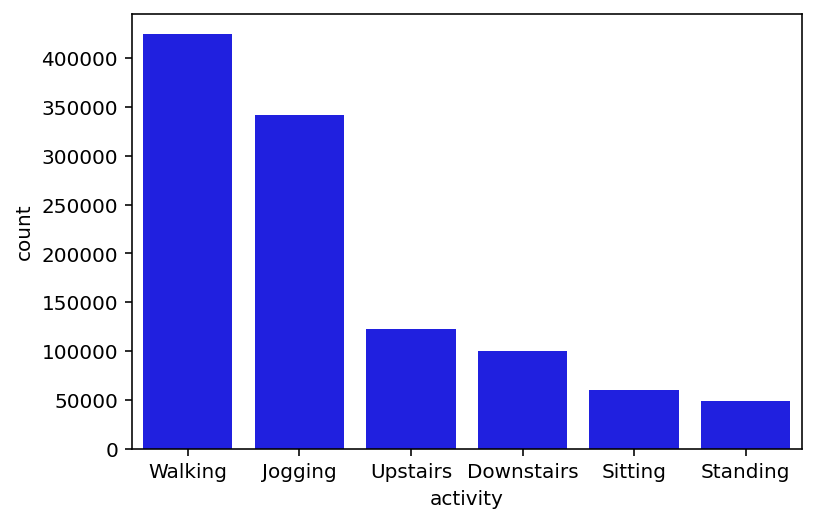

In [26]:
# plot the activities distribution for the wisdm dataset
sns.countplot(x = 'activity',
              data = df_wd,
              order = df_wd.activity.value_counts().index,
              color = 'b'
              );

In [34]:
# define a function to plot the sensor data of a user provided activitiy
def plot_activity(activity, df,sensor = 0,begin = 2000,end = 2200):
    sensor_dict = {
        0:'attitude',
        1:'gravity',
        2:'rotationRate',
        3:'userAcceleration',
        4:'axis' # This is the sum of gravity and userAcceleration, which was the only data collected by WISDM datasets
    }
    if sensor == 4:
        x ='x_'+sensor_dict[sensor]
        y ='y_'+sensor_dict[sensor]
        z ='z_'+sensor_dict[sensor]
    elif sensor == 0:
        x = sensor_dict[sensor]+'.roll'
        y = sensor_dict[sensor]+'.pitch'
        z = sensor_dict[sensor]+'.yaw'
    else:
        x = sensor_dict[sensor]+'.x'
        y = sensor_dict[sensor]+'.y'
        z = sensor_dict[sensor]+'.z'
    data = df[df['activity'] == activity][[x,y,z]].iloc[begin:end]
    
    axis = data.plot(figsize=(8, 6), 
                     title=activity)
    axis.legend(loc='lower left',bbox_to_anchor=(1.0,0.5)) 


In [29]:
activity_list = ['Sitting','Jogging','Downstairs','Upstairs','Walking','Standing']

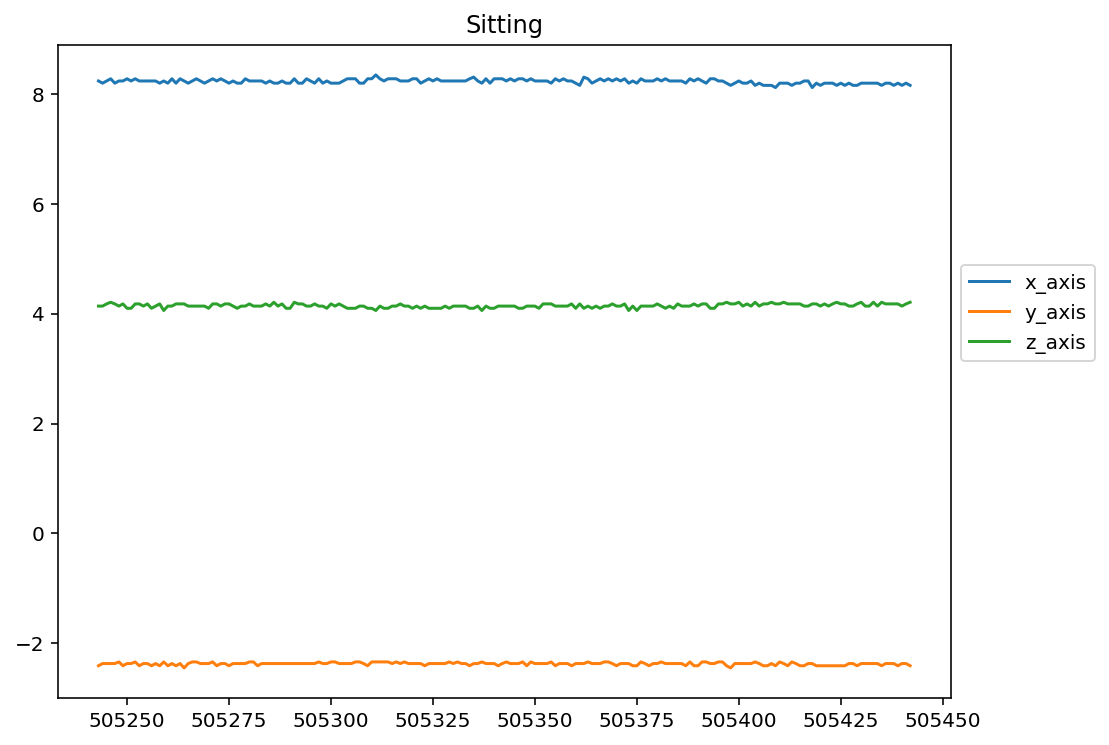

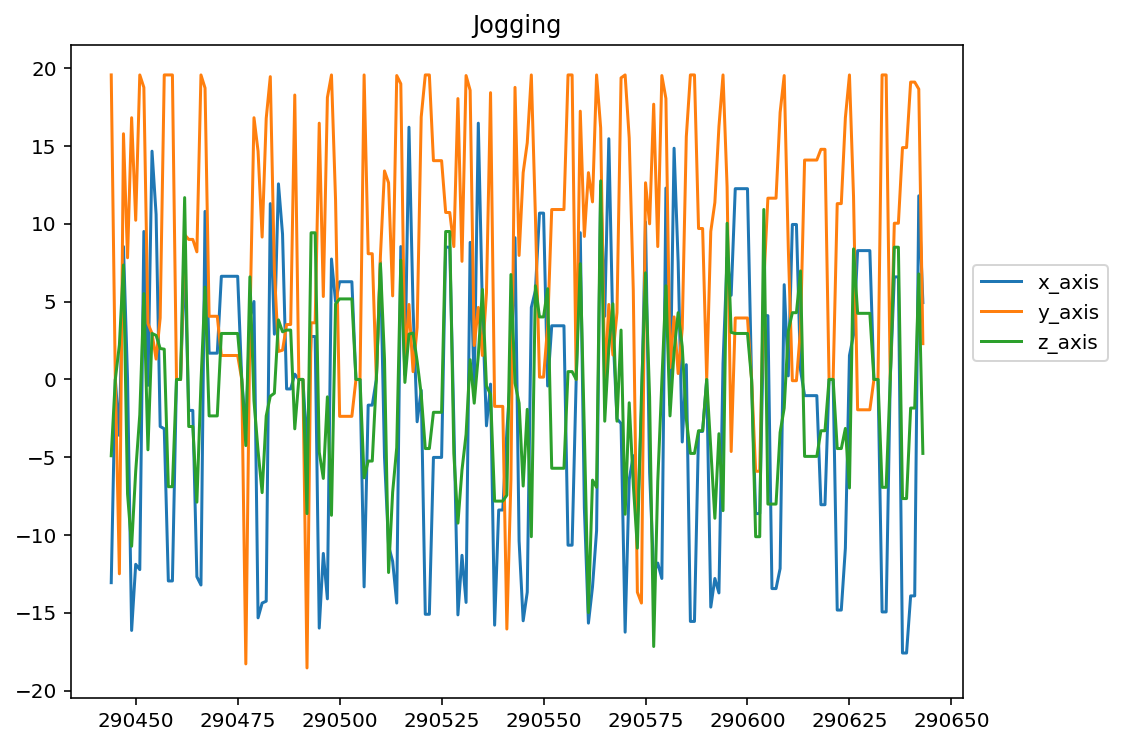

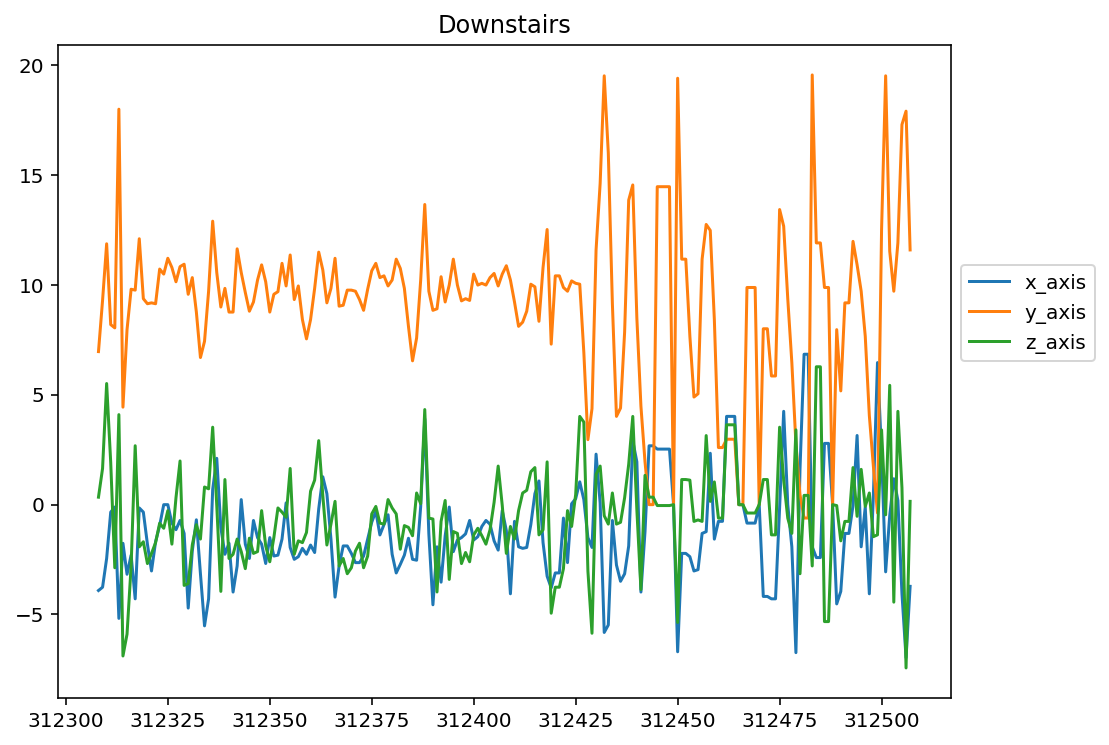

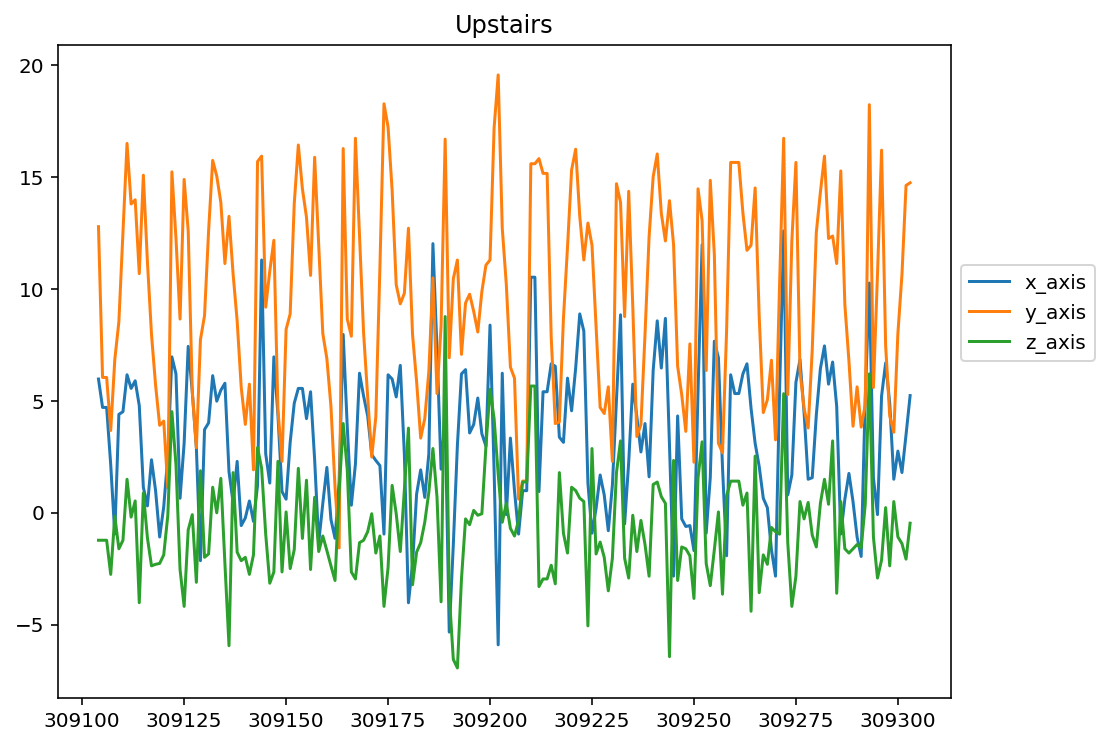

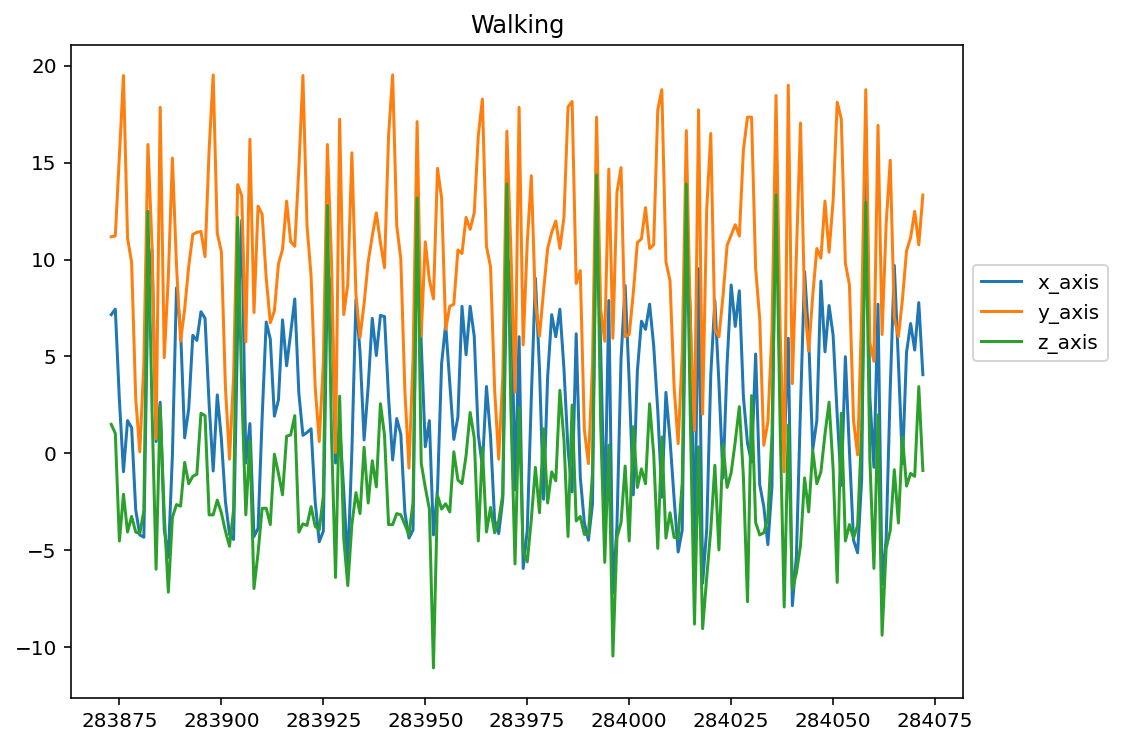

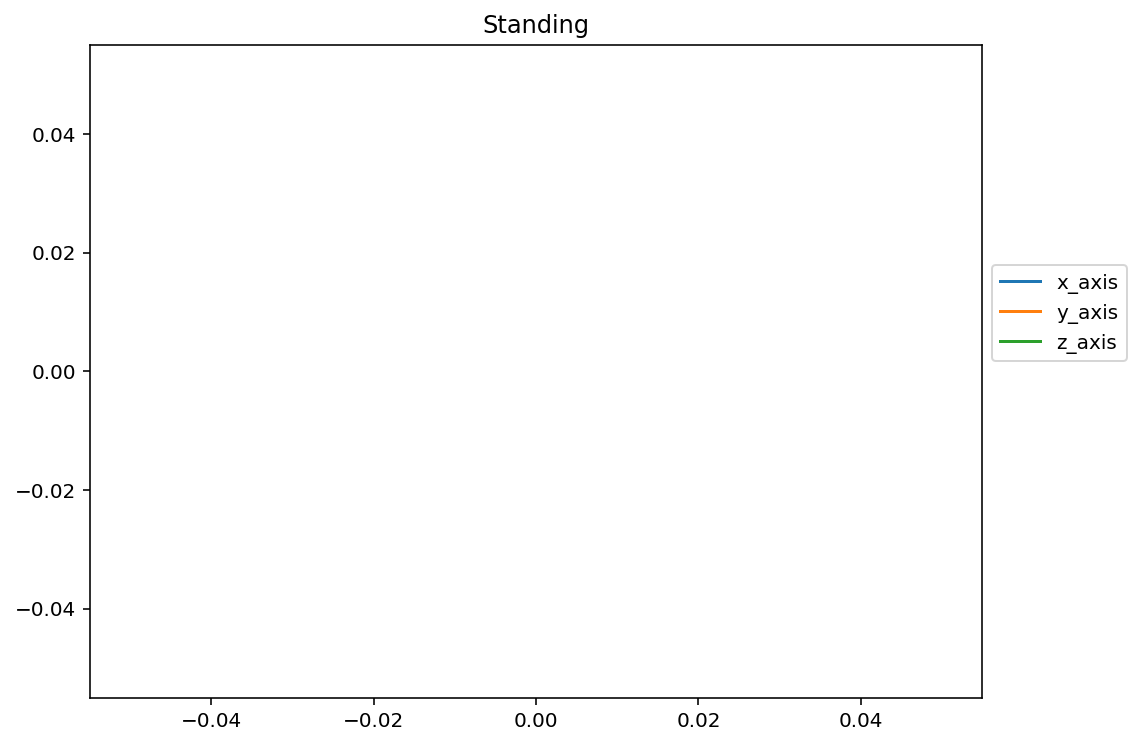

In [38]:
#Plot the user acceleration for all activities with 200 samples - wisdm dataset
for act in activity_list:
    plot_activity(act,df_wd[df_wd['user_id']==32],4)

**Comments**
- This user didn't have standing data collected
- Different activities have different patterns for user acceleration.
- To human, some of them looked very different(such as walking and sitting) while some of the looked similar (such as walking and upstairing). 

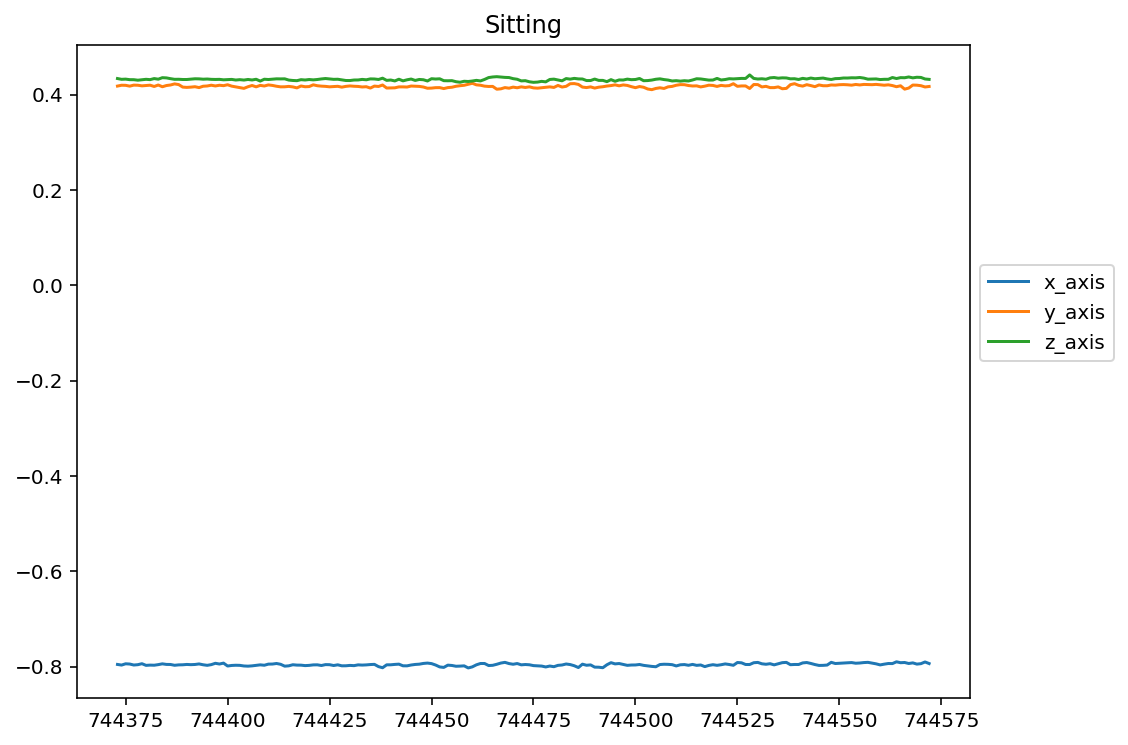

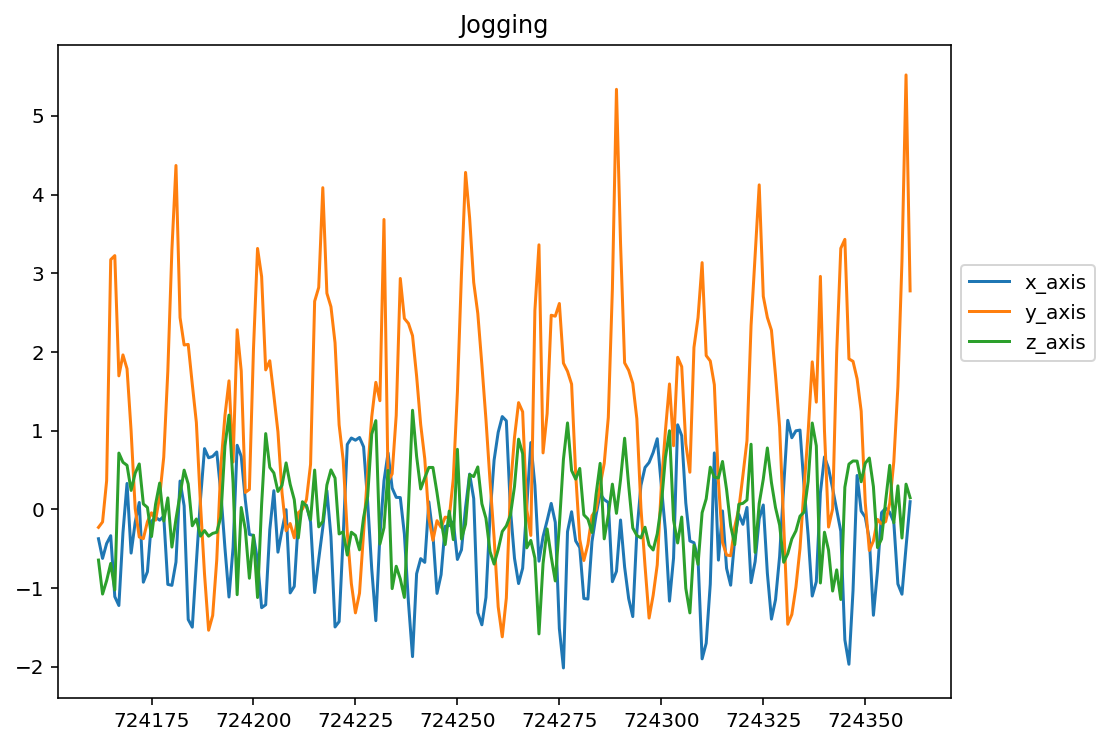

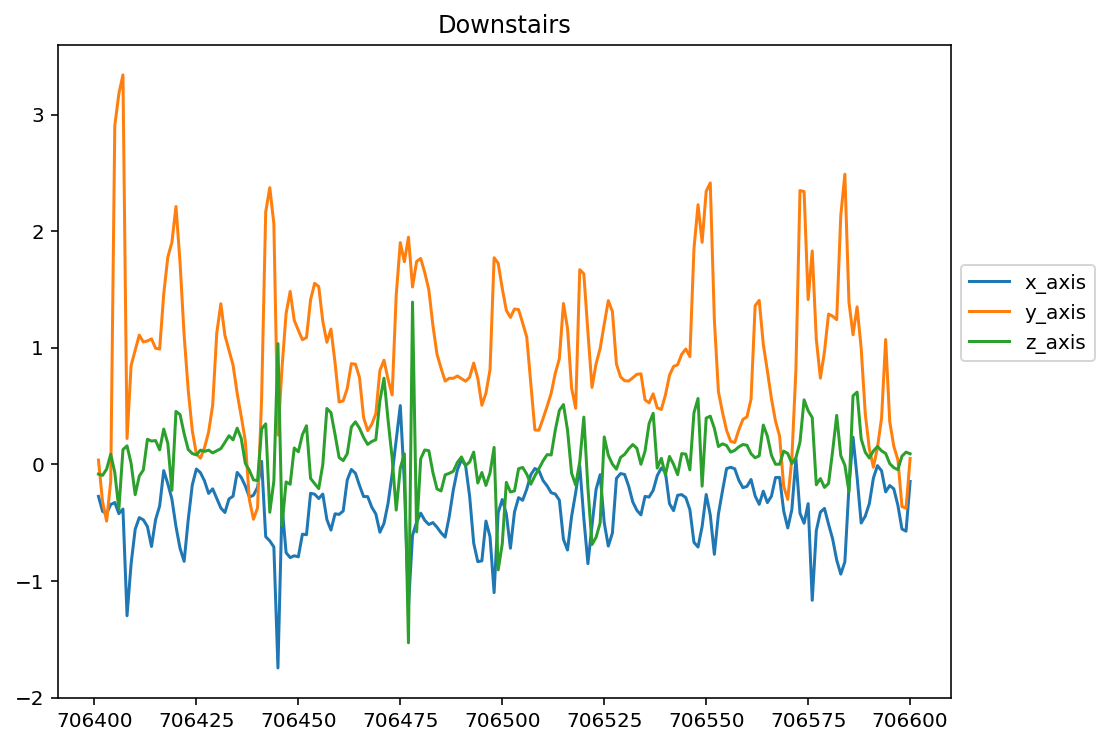

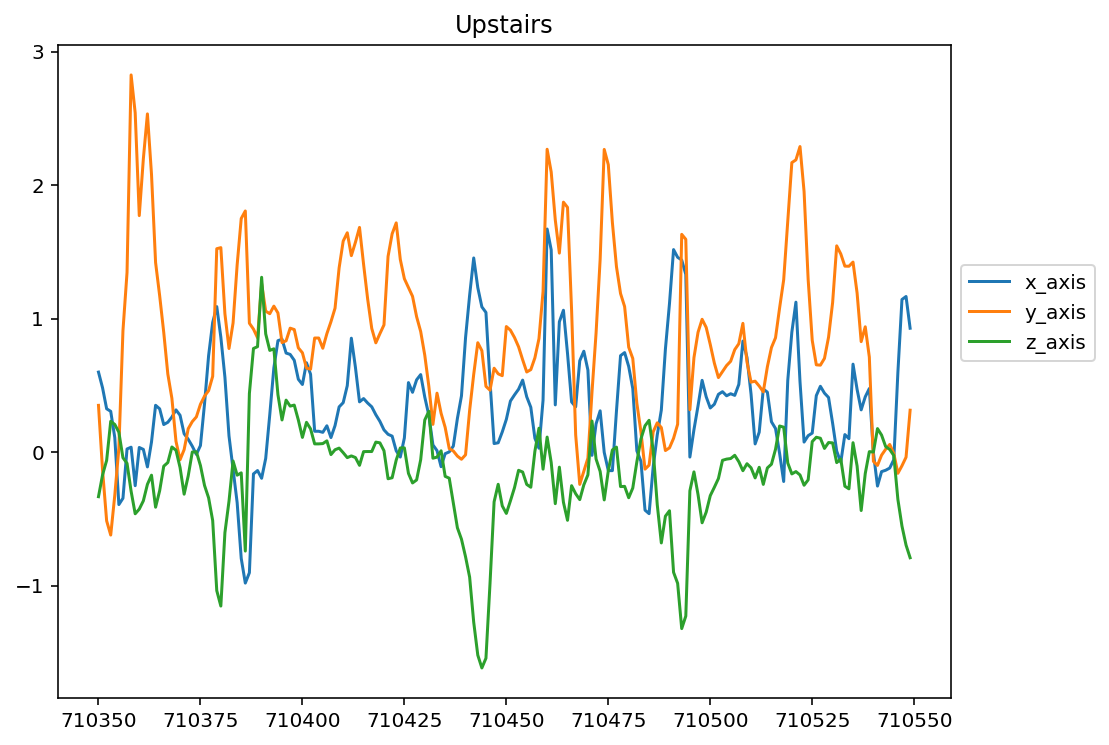

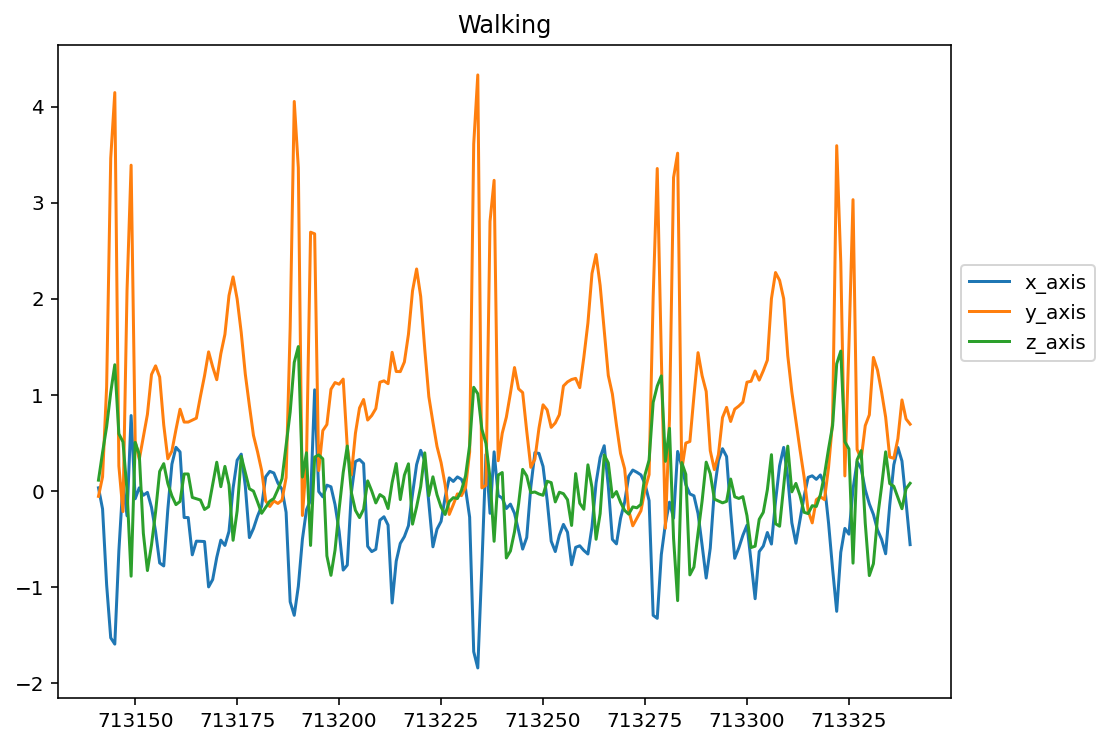

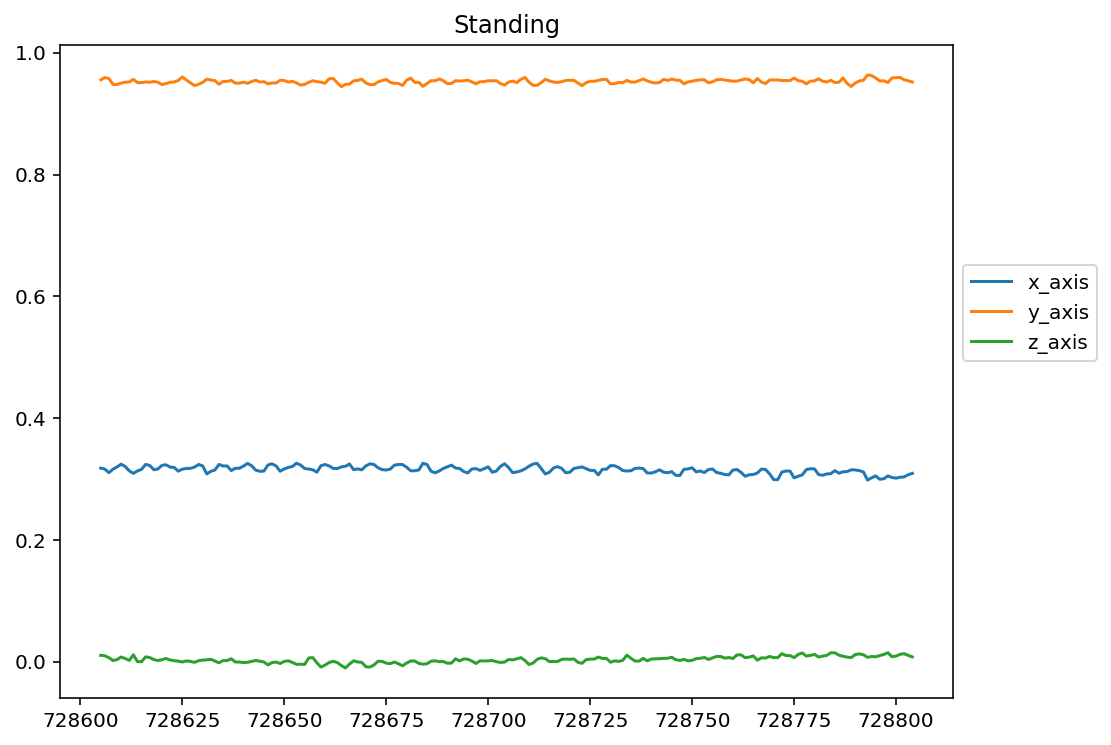

In [40]:
#Plot the user acceleration for all activities for 200 samples - ms dataset
for act in activity_list:
    plot_activity(act,df_ms[df_ms['user_id']==62],4)

**Comments**
- MS and WIDSM datasets have different scales, need to calibrate before combining them
- Since the MS and WIDSM datasets had different sample rate, it's better not to use the same window length to create model building datasets. Taking 'walking' as an example, 200 samples had about 5 periods for MS datasets and about 10 periods for WIDSM datasets. Namely, the window length to create model building datasets should have a ratio of 2 for MS and WIDSM datasets for this case.

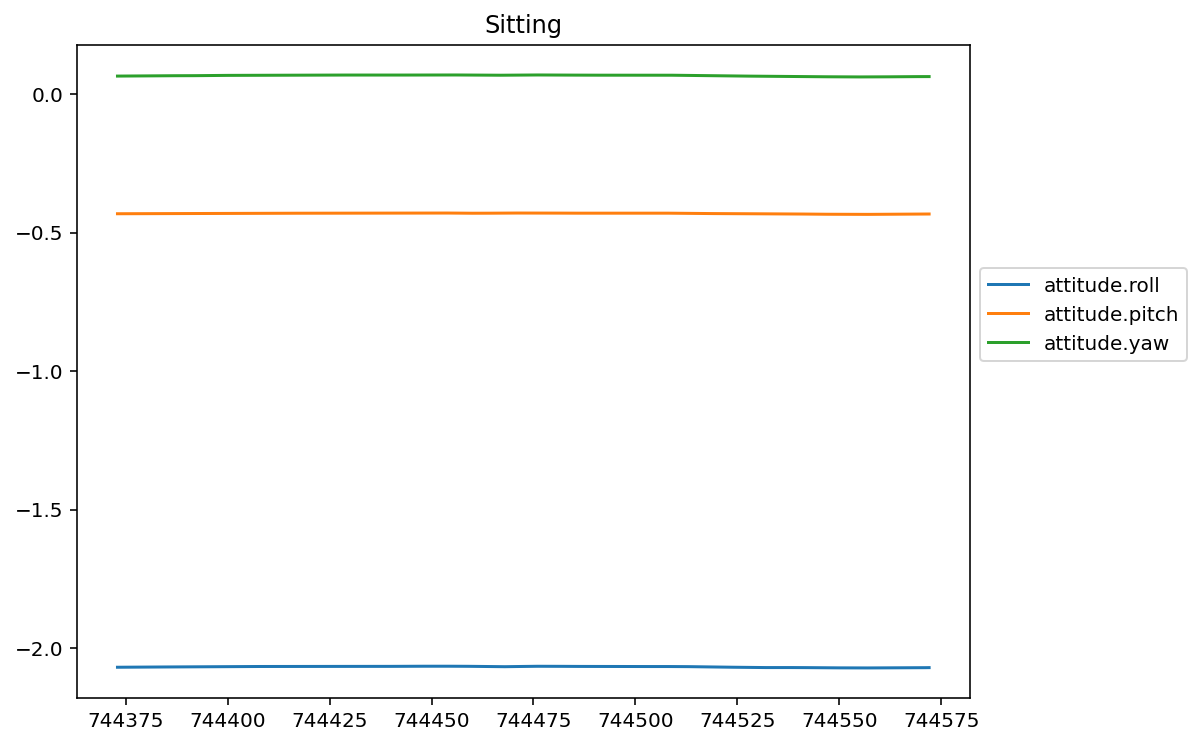

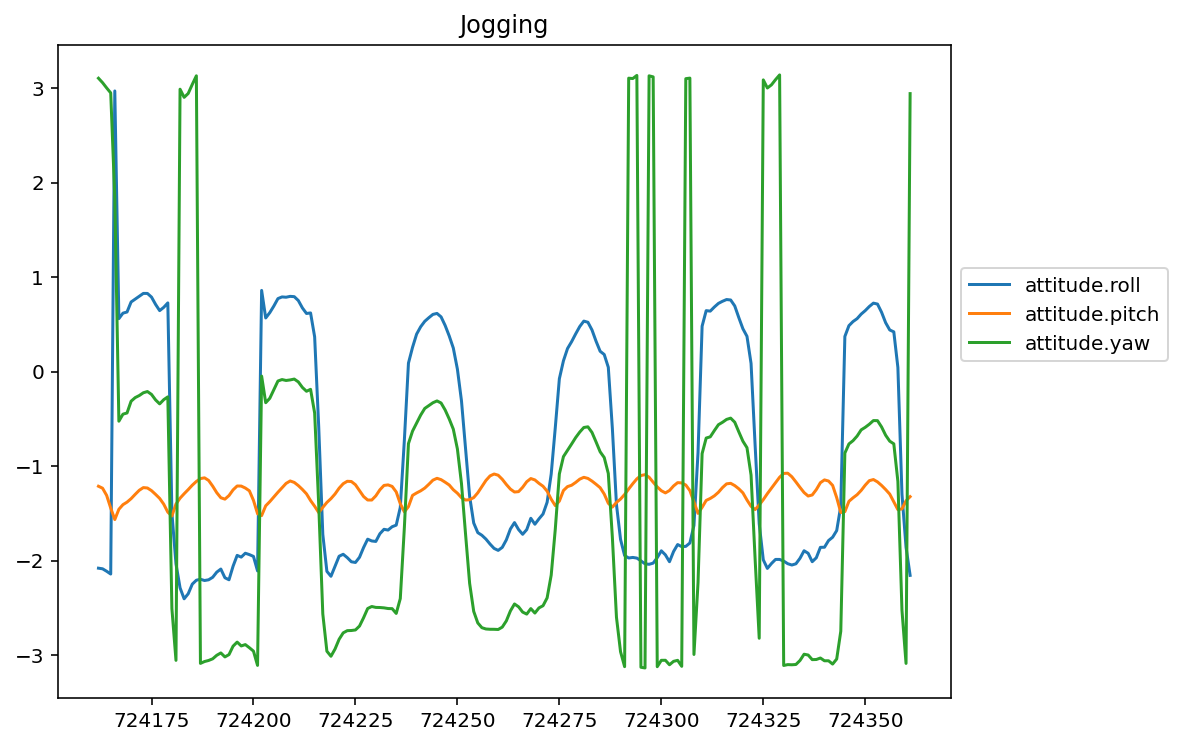

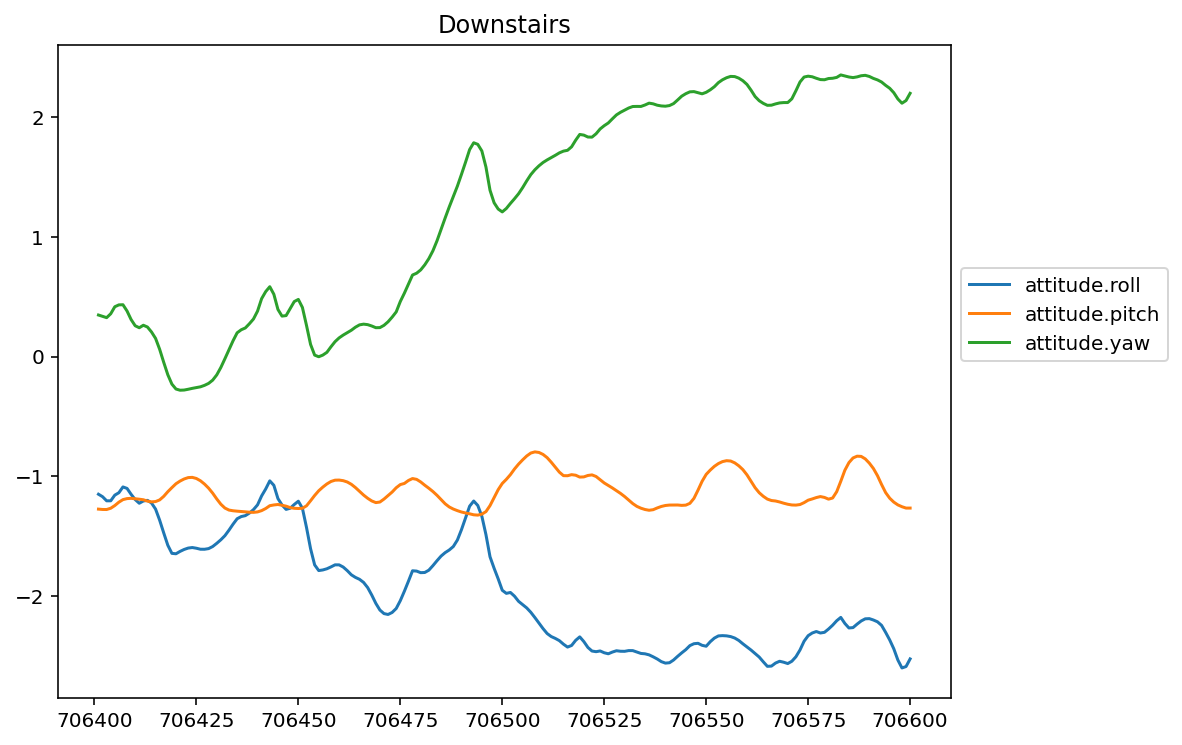

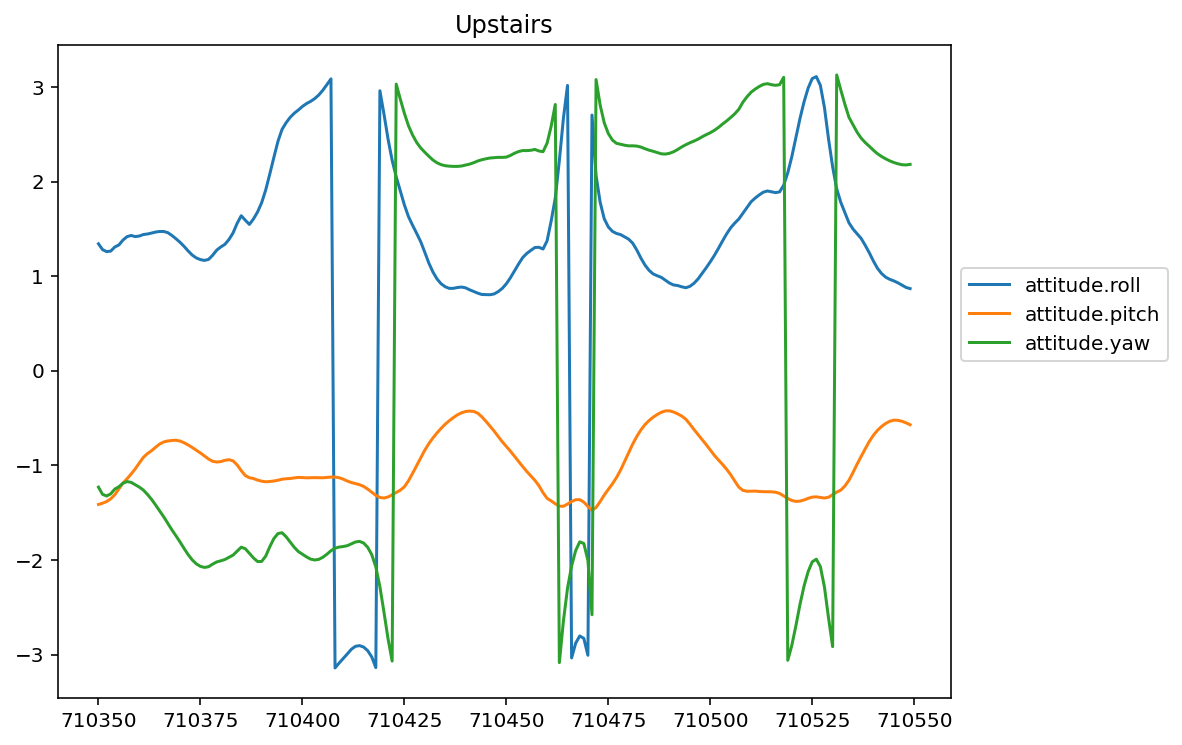

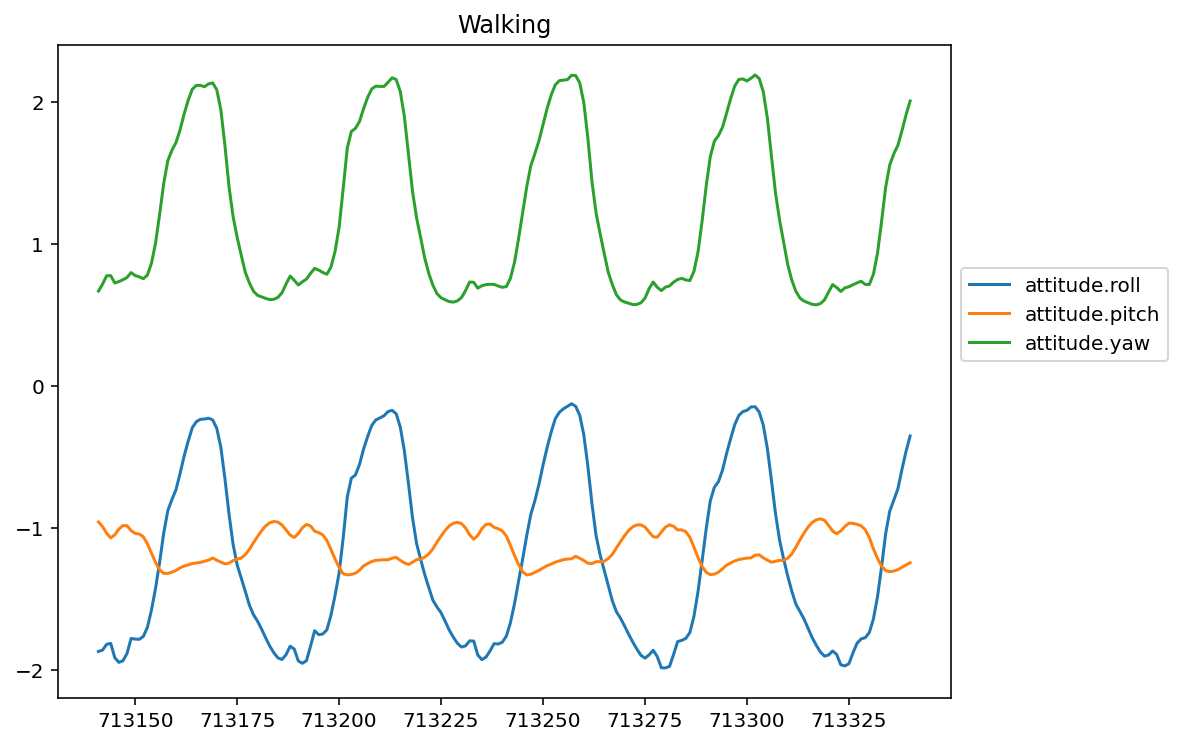

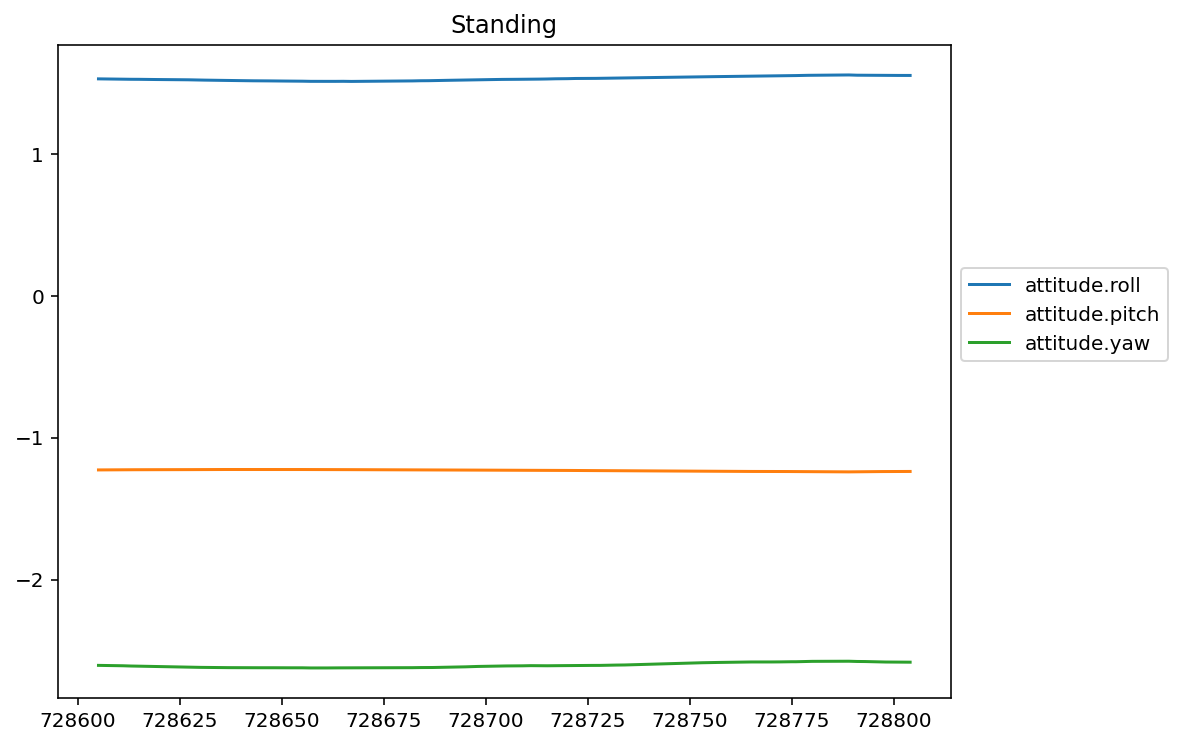

In [39]:
#Plot the user attitude for all activities for 200 samples - ms dataset
for act in activity_list:
    plot_activity(act,df_ms[df_ms['user_id']==62],0)

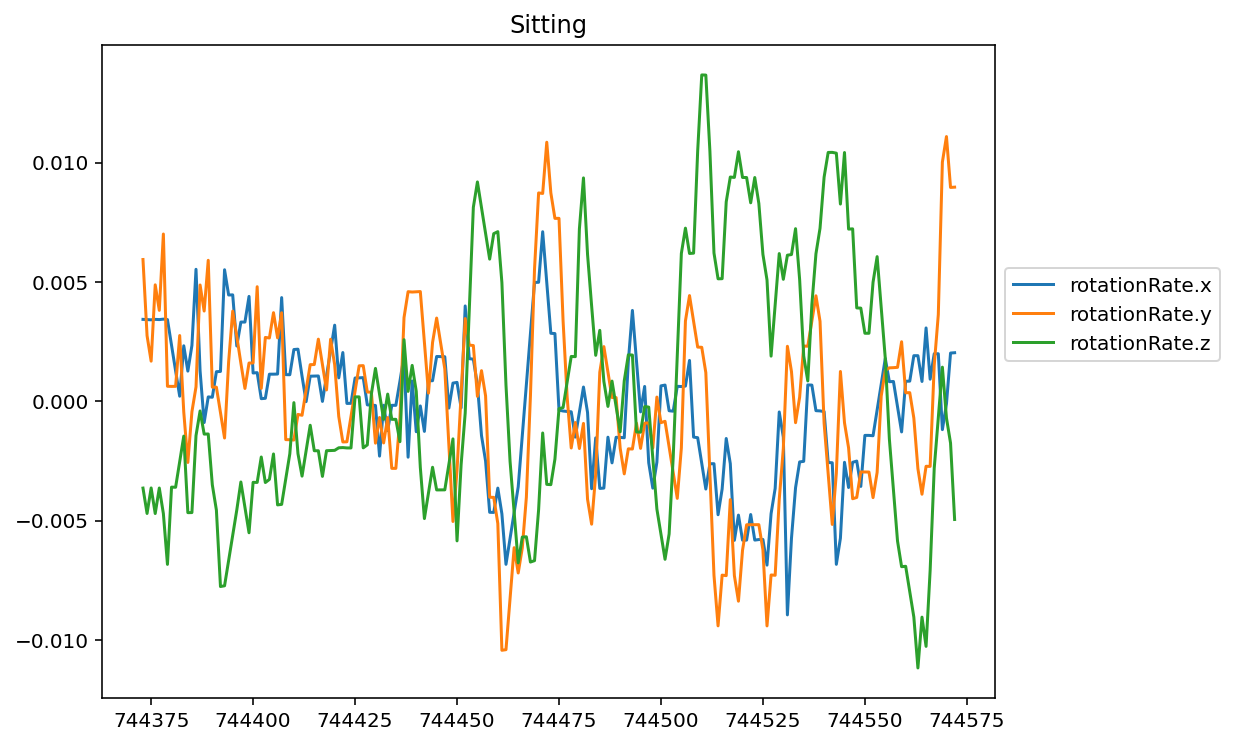

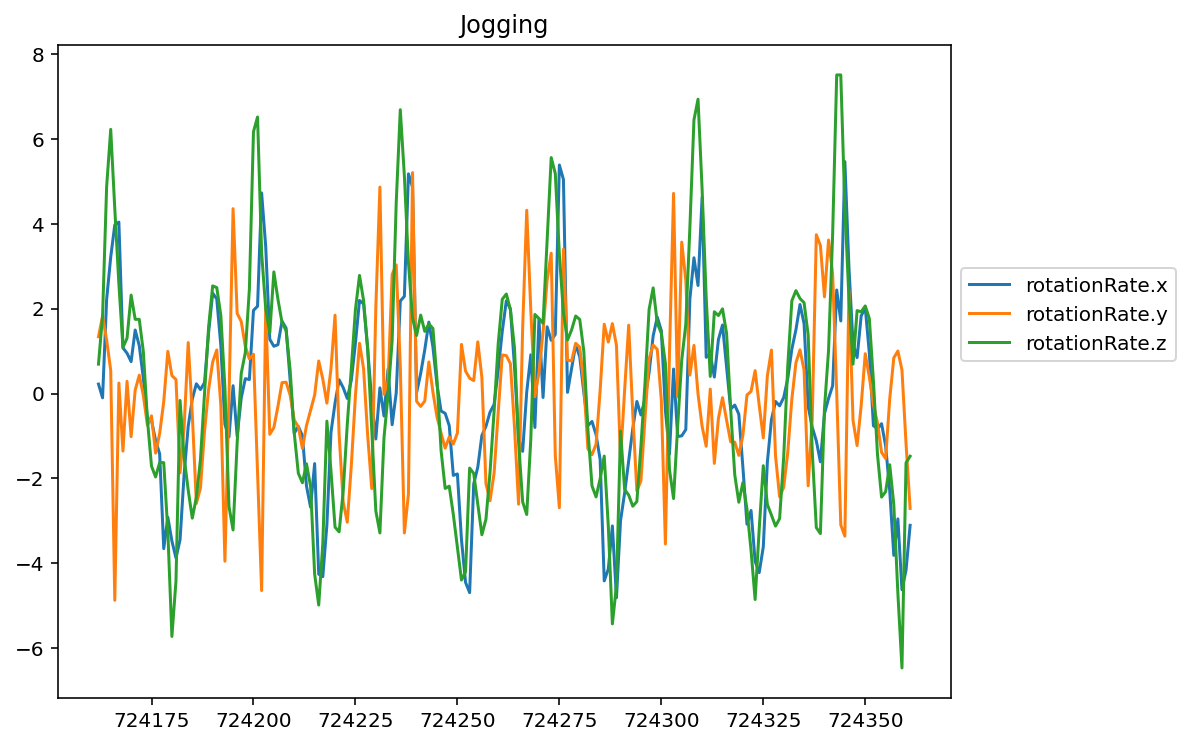

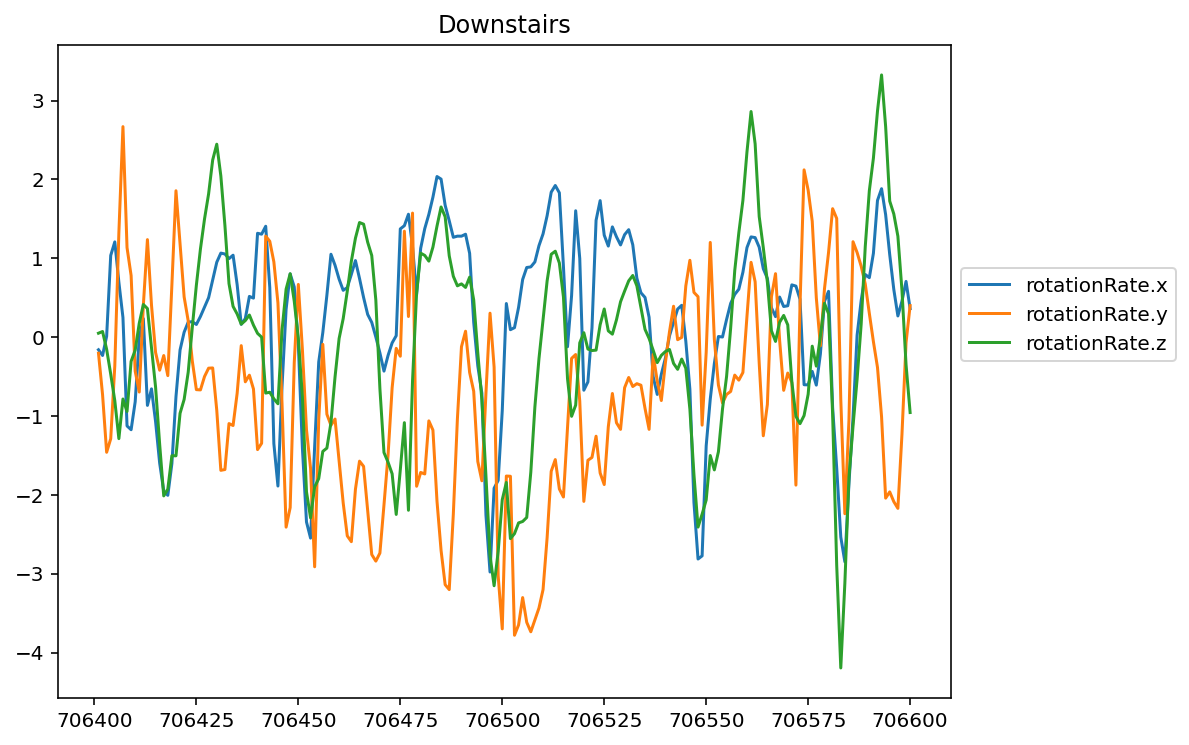

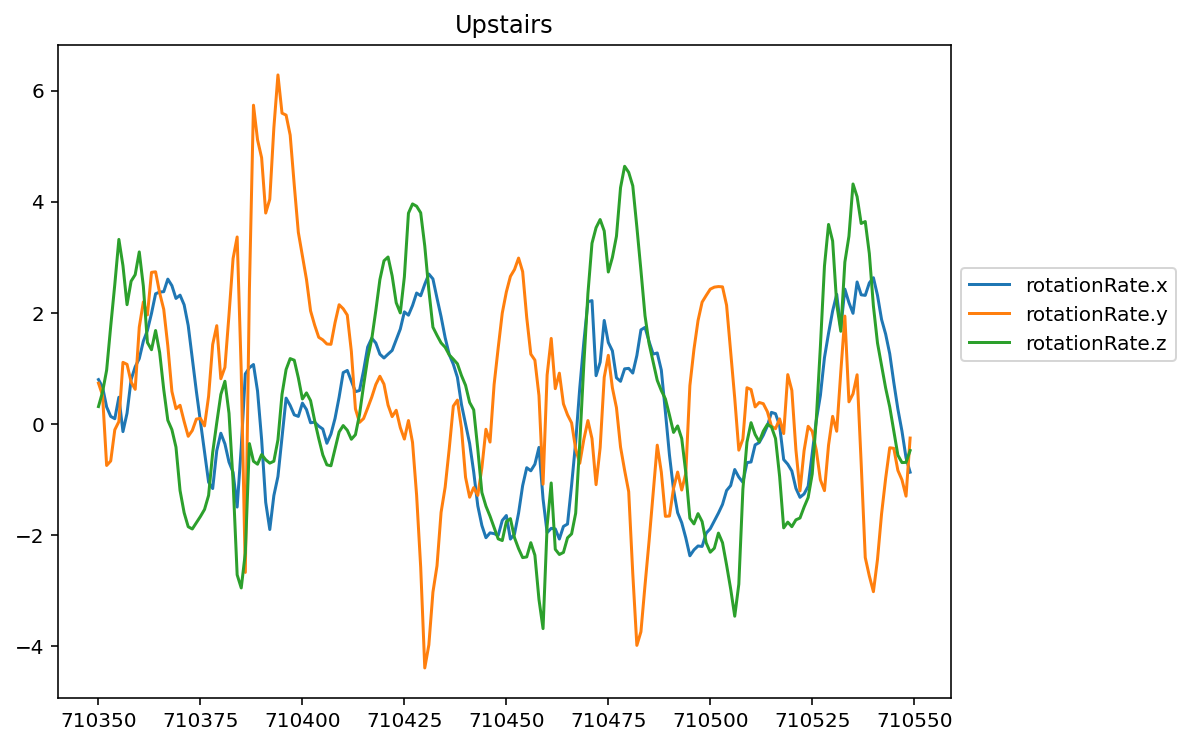

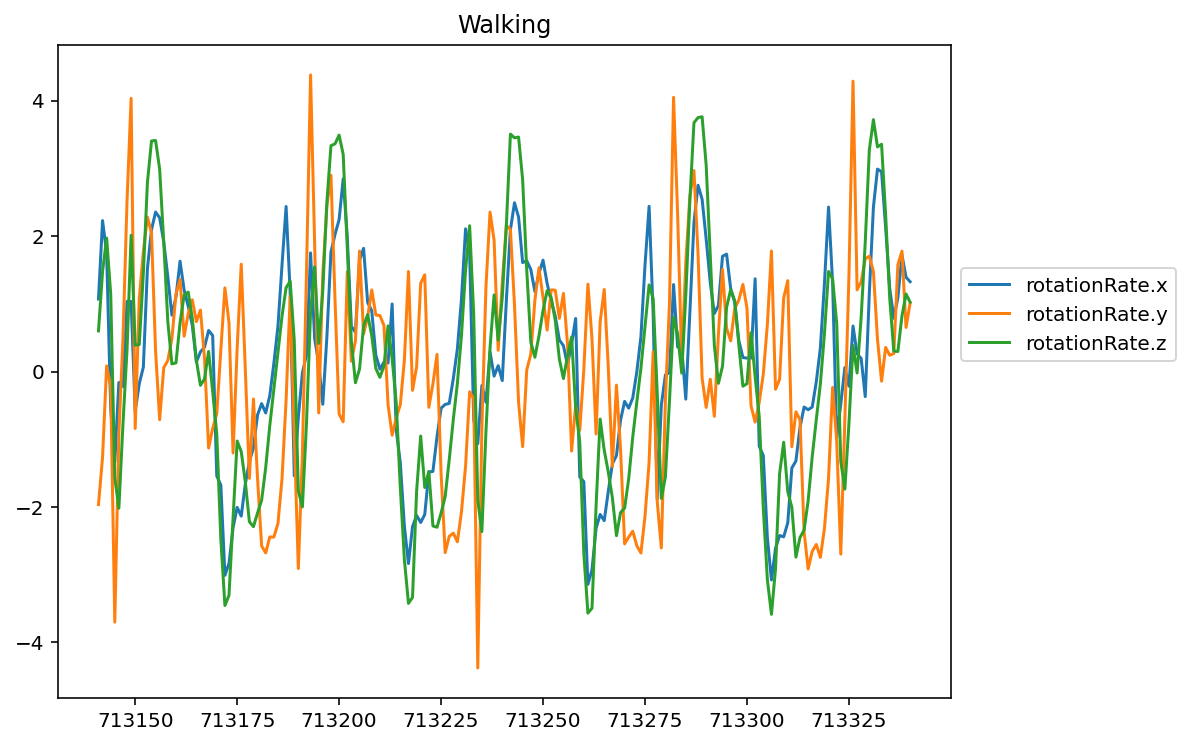

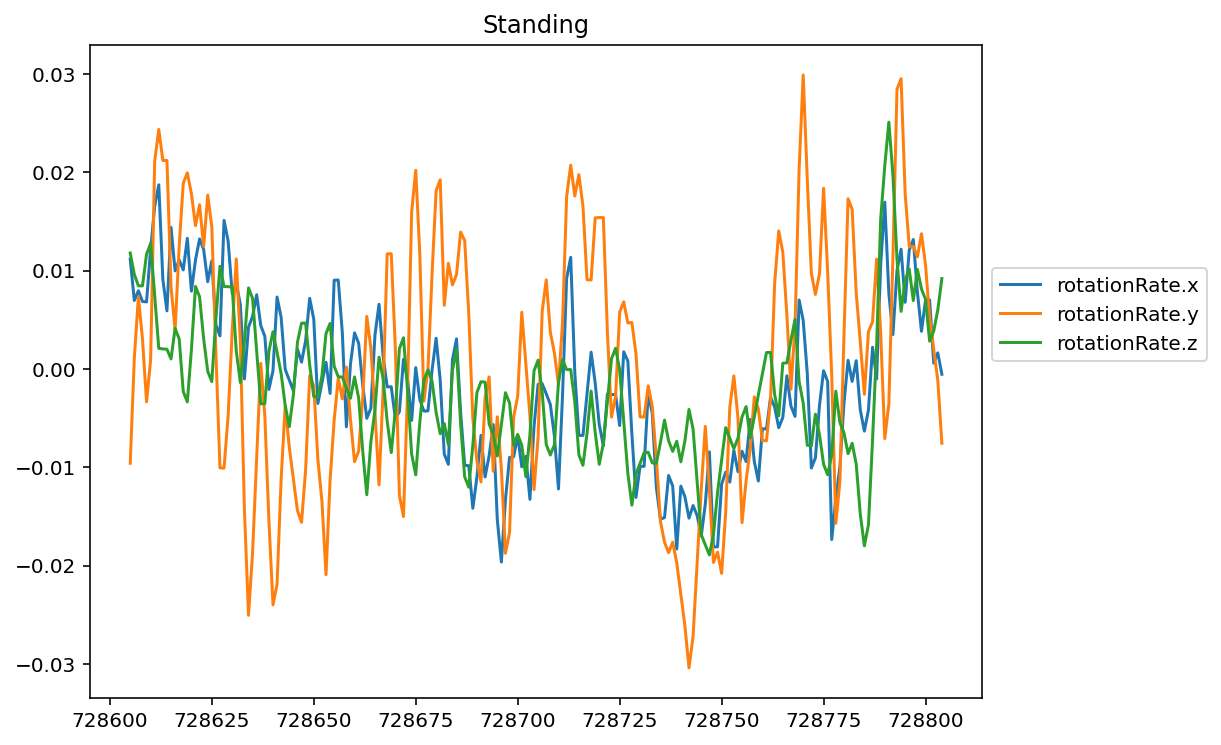

In [41]:
#Plot the user rotationRate for all activities for 200 samples - ms dataset
for act in activity_list:
    plot_activity(act,df_ms[df_ms['user_id']==62],2)

**Comments**
- MS had more features recorded and they looked different for different activities
- Better results should be expected by using more features for building classification models than only using acceleration data, as can be seen in section 6 part 5